In [3]:
import pandas as pd
import numpy as np
import libreria_marina
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Clean_Loyalty_Program.csv')

In [4]:
libreria_marina.exploracion_basica(df)

=== EXPLORACIÓN BÁSICA DEL DATASET ===

Primeras filas:
   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed Country          Province          City  \
0               

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Tendencia general:

- La cantidad de vuelos reservados aumenta de forma progresiva desde enero hasta julio, alcanzando un pico en julio (193.431 vuelos).

- A partir de agosto, el volumen comienza a descender ligeramente, aunque diciembre vuelve a repuntar con 166.047 vuelos, posiblemente por las vacaciones de fin de año.

- Los meses con menor actividad son enero y febrero (menos de 97.000 vuelos cada uno).

Comparación entre años (2017 vs. 2018):

- En casi todos los meses, 2018 muestra una mayor cantidad de vuelos reservados que 2017, especialmente en verano (junio–agosto).

- Esto sugiere un crecimiento en la actividad general de los clientes entre ambos años.

Patrones estacionales:

- Se aprecia un claro patrón estacional: los clientes tienden a reservar más vuelos durante los meses de verano (junio, julio, agosto).

- También hay un repunte destacable en diciembre, lo que puede estar vinculado a viajes navideños o de fin de año.

In [5]:
# primero, agrupamos por mes y sumamos los vuelos
vuelos_por_mes = df.groupby("Month")["Flights Booked"].sum().reset_index()
vuelos_por_mes

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


In [6]:
# después, agrupamos también los vuelos por mes y por año
vuelos_por_mes_año = df.groupby(["Year", "Month"])["Flights Booked"].sum().reset_index()
vuelos_por_mes_año

,Year,Month,Flights Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


Usamos barplot porque estamos respondiendo a cuántos vuelos se reservaron por mes, que es una comparación entre cantidades agrupadas por categorías (los meses).

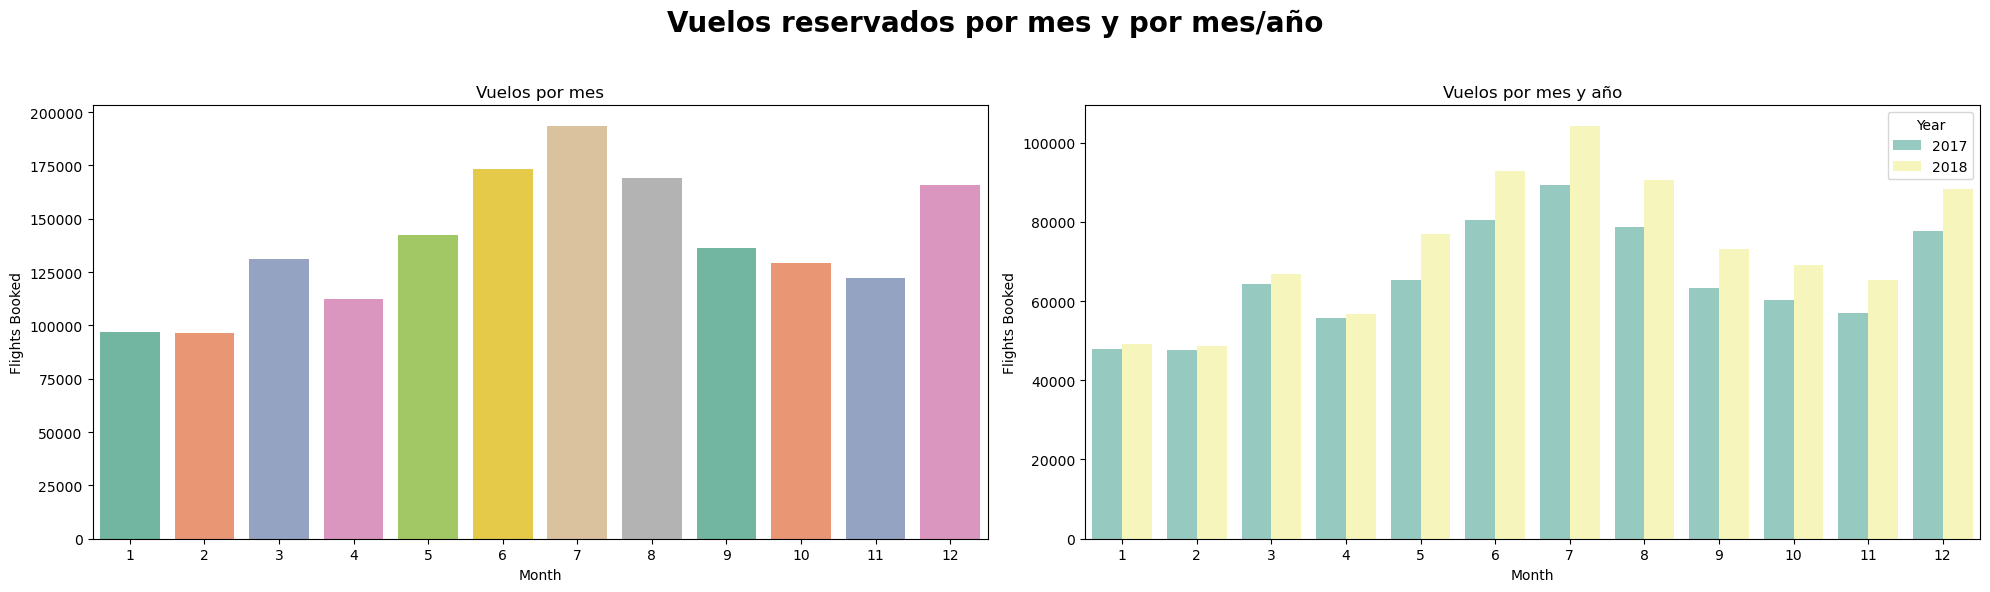

In [7]:
# Crear figura con 2 gráficos (lado a lado)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Título general
plt.suptitle("Vuelos reservados por mes y por mes/año", fontsize=20, fontweight='bold')

# Gráfico 1: por mes
sns.barplot(
    x="Month",
    y="Flights Booked",
    data=vuelos_por_mes,
    ax=axes[0],
    palette="Set2",
    ci=None
)
axes[0].set_title("Vuelos por mes")

# Gráfico 2: por mes y año
sns.barplot(
    x="Month",
    y="Flights Booked",
    hue="Year",
    data=vuelos_por_mes_año,
    ax=axes[1],
    palette="Set3",
    ci=None
)
axes[1].set_title("Vuelos por mes y año")

# Ajustar el layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

### 2. ¿Existe una relación entre la distancia y los puntos acumulados?

- Optamos por una gráfica de regresión (regplot) porque tenemos dos variables numéricas y queremos ver si hay relación entre ellas. En este caso, ver si a mayor distancia, se acumulan más puntos.

- El gráfico muestra una relación lineal clara y fuerte entre la distancia del vuelo y los puntos acumulados por los clientes. A mayor distancia, mayor es el número de puntos obtenidos.

- Se ha calculado la correlación de Pearson entre la distancia del vuelo y los puntos acumulados, obteniendo un valor de 0.99, lo que indica una relación lineal positiva muy fuerte. Esto confirma que los puntos acumulados dependen directamente de la distancia recorrida por los clientes.


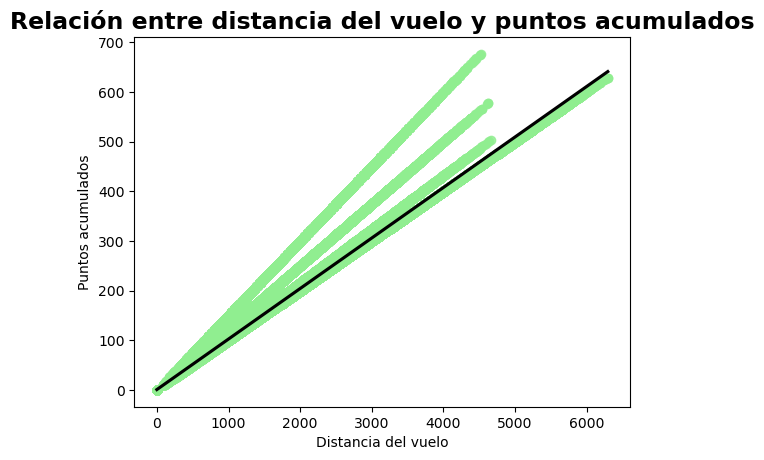

In [14]:
# Creamos una gráfica de regresión para analizar la relación entre distancia y puntos
sns.regplot(
    x="Distance",
    y="Points Accumulated",
    data=df,
    marker="o",
    line_kws={"color": "black"},
    scatter_kws={"color": "lightgreen"}
)

# Cambiamos etiquetas de los ejes
plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")

# Ponemos título
plt.title("Relación entre distancia del vuelo y puntos acumulados", fontsize=17, fontweight="bold")

plt.show()

In [15]:
df[["Distance", "Points Accumulated"]].corr()

,Distance,Points Accumulated
Distance,1.000000,0.994546
Points Accumulated,0.994546,1.000000


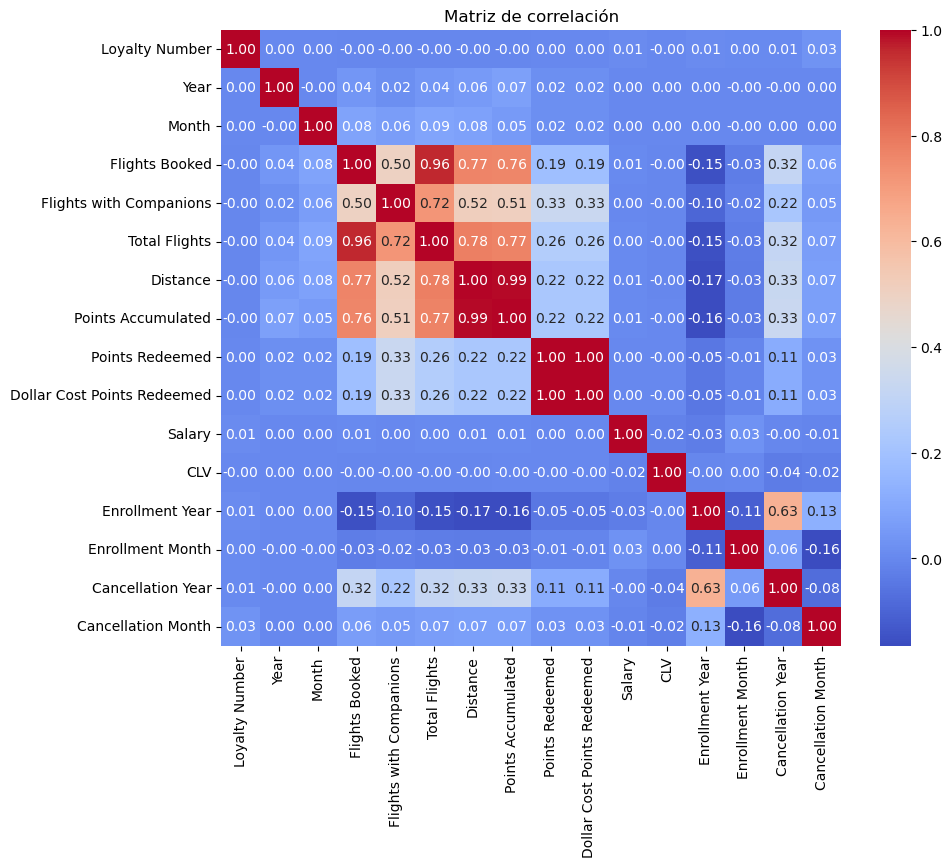

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

- Optamos por un barplot horizontal, que es ideal para mostrar categorías con nombres largos porque se lee mejor de arriba a abajo que de izquierda a derecha.

- La mayoría de los clientes proceden de las provincias más pobladas, especialmente Ontario, seguida de British Columbia y Quebec.
Esto es coherente con la distribución geográfica y demográfica de la población en Canadá, y puede reflejar también la cobertura del programa de fidelización.

- Las tres primeras provincias se diferencian bastante de la siguiente, que es Alberta.

In [17]:
# Agrupar datos: contamos cuántos clientes hay por provincia
clientes_por_provincia = df["Province"].value_counts().reset_index()
clientes_por_provincia.columns = ["Province", "Clientes"]
clientes_por_provincia

,Province,Clientes
0,Ontario,130258
1,British Columbia,106442
2,Quebec,79573
3,Alberta,23360
4,Manitoba,15900
5,New Brunswick,15352
6,Nova Scotia,12507
7,Saskatchewan,9861
8,Newfoundland,6244
9,Yukon,2679


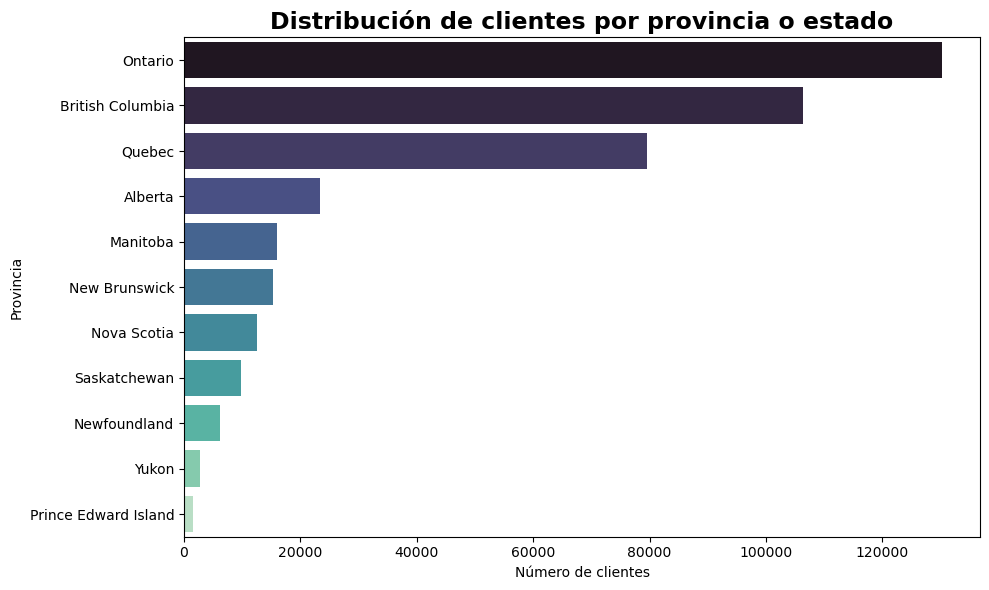

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.barplot(
    data=clientes_por_provincia,
    y="Province",
    x="Clientes",
    ax=axes,
    palette="mako"
)

# Etiquetas y título
plt.xlabel("Número de clientes")
plt.ylabel("Provincia")
plt.title("Distribución de clientes por provincia o estado", fontsize=17, fontweight="bold")

# Ajustar el gráfico
plt.tight_layout()

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

- Queremos responder a esta pregunta complementándolo con cuál es la distribución de los clientes por nivel educativo.

- Primero, agrupamos todos los clientes por nivel educativo y calculamos el salario medio en cada grupo. Ordenamos para que las categorías aparezcan en el mismo orden en la gráfica.

- A continuación, contamos cuántos clientes hay por nivel educativo.

- Mostramos todo en dos gráficas:
    - Gráfico 1: un pastel que muestra qué proporción del total representa cada nivel educativo.
    - Gráfico 2: un barplot con el salario promedio por nivel educativo.

#### Conclusiones

Salario medio:
- Se observa una diferencia clara en el salario medio según el nivel educativo.

- Los clientes con estudios de Doctorado tienen el salario más alto, seguidos de los que tienen Máster.

- Los salarios más bajos se dan entre quienes tienen High School or Below.

- Esto refleja una relación directa entre nivel educativo y poder adquisitivo.

Distribución de clientes:
- La mayoría de los clientes tienen nivel de Bachelor (más de 250.000 personas), seguido por College.

- Los niveles de posgrado (Máster y Doctorado) son mucho menos comunes, pero tienen salarios más altos. Esto sugiere que, aunque el grupo más numeroso tiene estudios universitarios, los clientes más rentables podrían encontrarse en los niveles superiores de educación.

In [ ]:
# calculamos salario medio por educación
salario_educacion = round(df.groupby("Education")["Salary"].mean(), 2)
salario_educacion = salario_educacion.sort_index().reset_index()
salario_educacion

,Education,Salary
0,Bachelor,72599.08
1,College,79371.73
2,Doctor,178403.68
3,High School or Below,61146.38
4,Master,103734.52


In [ ]:
# calculamos el número de clientes por nivel educativo
educacion = df["Education"].value_counts().sort_index()
educacion

Education
Bachelor                252567
College                 102260
Doctor                   17731
High School or Below     18915
Master                   12287
Name: count, dtype: int64

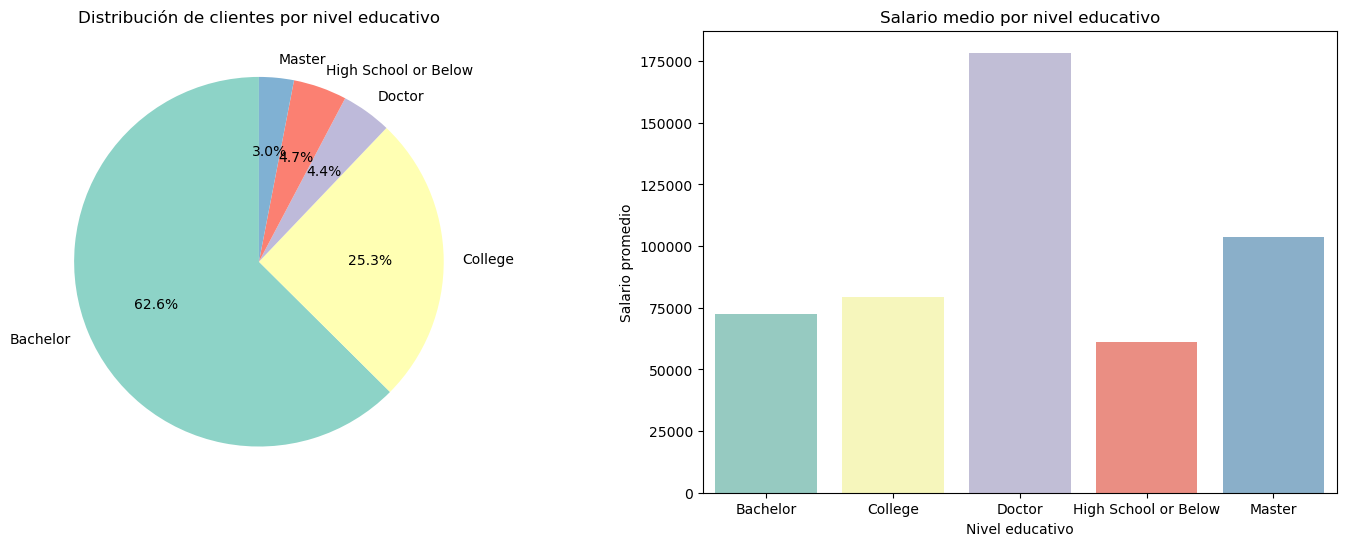

In [30]:
# Gráfico 1: pastel con proporción de clientes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes[0].pie(
    educacion,
    labels=educacion.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Set3")
)
axes[0].set_title("Distribución de clientes por nivel educativo")

# Gráfico 2: barra con salario medio
sns.barplot(
    data=salario_educacion,
    x="Education",
    y="Salary",
    ax=axes[1],
    palette="Set3"
)
axes[1].set_title("Salario medio por nivel educativo")
axes[1].set_ylabel("Salario promedio")
axes[1].set_xlabel("Nivel educativo")
plt.show()

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

- Optamos por el gráfico de pastel (pie) porque es ideal para mostrar proporciones.

- La mayoría de los clientes poseen tarjetas del tipo Star, seguidas por Nova y Aurora.
Esto sugiere que la tarjeta Star puede ser la más básica o más extendida del programa.
Las proporciones ayudan a entender la distribución de los clientes según su nivel de fidelidad o beneficios recibidos.

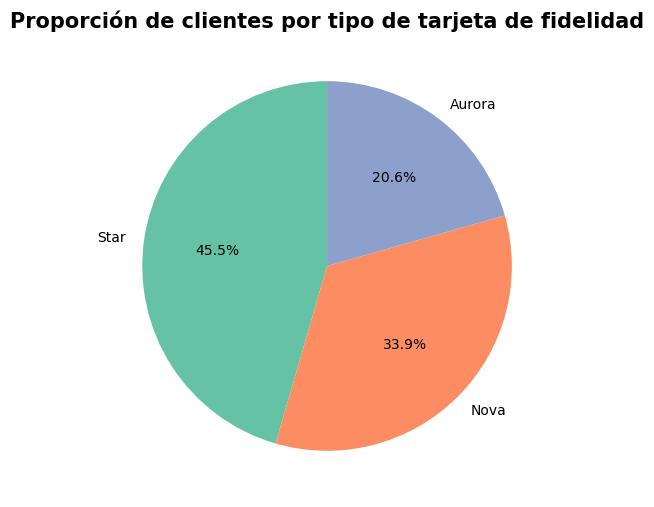

In [ ]:
# Contamos los tipos de tarjeta
tarjetas = df["Loyalty Card"].value_counts()

# Creamos la figura
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

# Gráfico de pastel
axes.pie(
    tarjetas,
    labels=tarjetas.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Set2")
)

plt.title("Proporción de clientes por tipo de tarjeta de fidelidad", fontsize=15, fontweight="bold")

plt.show()

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

- Usamos un barplot porque estamos trabajando con variables categóricas, "Marital Status" y "Gender", y lo que queremos es contar cuántas personas hay en cada combinación. Permite visualizar los datos de manera clara.

- El grupo más numeroso de clientes es el de personas casadas, seguido de solteros y divorciados.

- En todos los grupos, la proporción entre hombres y mujeres está muy equilibrada, con ligeras variaciones.

- Esto indica que el programa de fidelización tiene una distribución de género bastante homogénea en todos los perfiles de estado civil.

In [ ]:
# Agrupamos por sexo y estado civil y cuento
genero_civil = df.groupby(["Marital Status", "Gender"]).count().reset_index()
genero_civil

In [35]:
# vemos las categorías de sexo
genero = df["Gender"].value_counts()
genero

Gender
Female    202757
Male      201003
Name: count, dtype: int64

In [36]:
# vemos las categorías de estado civil
estado_civil = df["Marital Status"].value_counts()
estado_civil

Marital Status
Married     234845
Single      108153
Divorced     60762
Name: count, dtype: int64

In [37]:
# agrupamos correctamente y renombramos la columna
genero_civil = df.groupby(["Marital Status", "Gender"]).size().reset_index(name="Cantidad")
genero_civil

,Marital Status,Gender,Cantidad
0,Divorced,Female,30634
1,Divorced,Male,30128
2,Married,Female,117363
3,Married,Male,117482
4,Single,Female,54760
5,Single,Male,53393


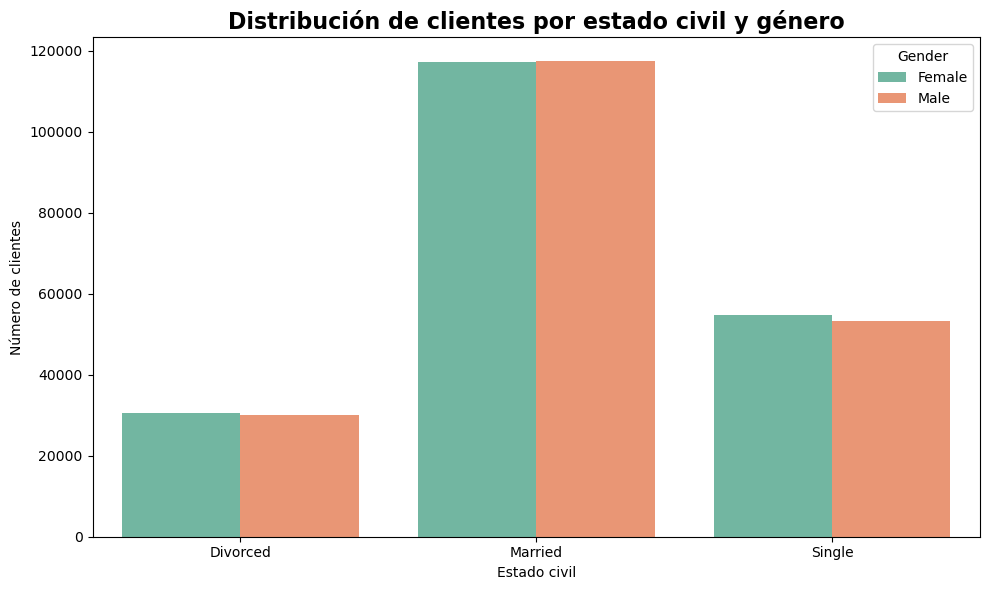

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.barplot(
    data=genero_civil,
    x="Marital Status",
    y="Cantidad",
    hue="Gender",
    ax=axes,
    palette="Set2"
)

# Etiquetas y título
plt.title("Distribución de clientes por estado civil y género", fontsize=16, fontweight="bold")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")

plt.tight_layout()
plt.show()